# LOAN DATASET

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn. metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

In [2]:
# loading into python
data = pd.read_csv('C:/Users/Asus/NORKA/06th jan 2023/DATA/loan_dataset.csv')

In [3]:
# Print information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116058 entries, 0 to 116057
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   loan_id                   116058 non-null  int64  
 1   source                    116058 non-null  object 
 2   financial_institution     116058 non-null  object 
 3   interest_rate             116058 non-null  float64
 4   unpaid_principal_bal      116058 non-null  int64  
 5   loan_term                 116058 non-null  int64  
 6   origination_date          116058 non-null  object 
 7   first_payment_date        116058 non-null  object 
 8   loan_to_value             116058 non-null  int64  
 9   number_of_borrowers       116058 non-null  float64
 10  debt_to_income_ratio      116058 non-null  float64
 11  borrower_credit_score     116058 non-null  float64
 12  loan_purpose              116058 non-null  object 
 13  insurance_percent         116058 non-null  f

~  source , financial_institution, origination_date, first_payment_date, loan_purpose are of object type 

### CHECKING FOR NULL VALUES

In [4]:
# number of null values in the dataframe 
data.isnull().sum()

loan_id                     0
source                      0
financial_institution       0
interest_rate               0
unpaid_principal_bal        0
loan_term                   0
origination_date            0
first_payment_date          0
loan_to_value               0
number_of_borrowers         0
debt_to_income_ratio        0
borrower_credit_score       0
loan_purpose                0
insurance_percent           0
co-borrower_credit_score    0
insurance_type              0
m1                          0
m2                          0
m3                          0
m4                          0
m5                          0
m6                          0
m7                          0
m8                          0
m9                          0
m10                         0
m11                         0
m12                         0
m13                         0
dtype: int64

In [5]:
# display the first 5 rows of the dataframe
data.head()

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
0,268055008619,Z,"Turner, Baldwin and Rhodes",4.250,214000,360,2012-03-01,05/2012,95,1.0,...,0,0,0,1,0,0,0,0,0,1
1,672831657627,Y,"Swanson, Newton and Miller",4.875,144000,360,2012-01-01,03/2012,72,1.0,...,0,0,0,0,0,0,0,1,0,1
2,742515242108,Z,Thornton-Davis,3.250,366000,180,2012-01-01,03/2012,49,1.0,...,0,0,0,0,0,0,0,0,0,1
3,601385667462,X,OTHER,4.750,135000,360,2012-02-01,04/2012,46,2.0,...,0,0,0,0,0,1,1,1,1,1
4,273870029961,X,OTHER,4.750,124000,360,2012-02-01,04/2012,80,1.0,...,3,4,5,6,7,8,9,10,11,1


### CHECKING FOR DUPLICATES

In [6]:
# display the rows having duplicates 
data[data.duplicated()]

,loan_id,source,financial_institution,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13


~ no duplicate rows in the dataset

In [7]:
# count of unique values in the column
data['loan_id'].nunique()

116058

~ There are 116058 rows and 'loan_id' column is having 116058 unique values, hence it will not contribute much to the machine learning model. It can be removed.

In [8]:
# count of unique values in the column
data['financial_institution'].nunique()

19

In [9]:
# count of unique values in the column
data['loan_purpose'].nunique()

3

In [10]:
# removing 'loan_id', 'financial_institution', 'loan_purpose' columns from the dataframe
data = data.drop(['loan_id', 'financial_institution', 'loan_purpose'], axis = 1)

### CHECKING FOR OUTLIERS 

##### Outliers' in 'interest_rate' column


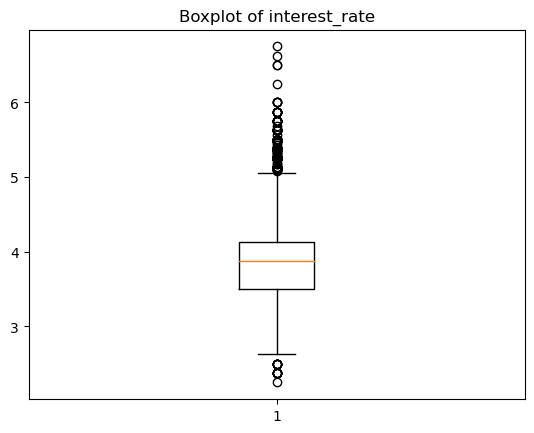

In [11]:
# Boxplot of 'interest_rate' column to check outliers
plt.boxplot(data['interest_rate'])

# display title
plt.title("Boxplot of interest_rate")

# display figures
plt.show()

In [12]:
# First Quartile of 'interest_rate' column
Q1_ir = np.percentile(data['interest_rate'], 25, interpolation='midpoint')
# Second Quartile of 'interest_rate' column
Q2_ir = np.percentile(data['interest_rate'], 50, interpolation='midpoint')
# Third Quartile of 'interest_rate' column
Q3_ir = np.percentile(data['interest_rate'], 75, interpolation='midpoint')
# (interquartile range) IQR of  'interest_rate' column
IQR_ir = Q3_ir-Q1_ir
# lower whisker of 'interest_rate'  column
low_ir = Q1_ir-1.5*IQR_ir 
# upper whisker of 'interest_rate' column
up_ir = Q3_ir+1.5*IQR_ir

# to find the outliers  in 'interest_rate' column and display it
outlier_ir = [] 
for x_ir in data['interest_rate']:
    if((x_ir>up_ir) or (x_ir<low_ir)):
        outlier_ir.append(x_ir)
f"Outliers of 'interest_rate' column = {outlier_ir}"


"Outliers of 'interest_rate' column = [5.125, 5.5, 5.125, 5.25, 5.125, 5.25, 5.25, 5.375, 5.125, 5.25, 5.75, 5.5, 5.375, 5.375, 5.5, 5.5, 5.125, 5.875, 5.5, 5.125, 5.125, 5.25, 5.375, 5.125, 5.375, 5.125, 5.125, 5.5, 5.125, 5.375, 5.375, 5.75, 5.5, 5.125, 5.5, 5.375, 5.25, 5.375, 5.375, 5.25, 5.625, 5.125, 5.125, 5.375, 5.25, 5.125, 5.125, 5.5, 5.375, 5.375, 5.75, 5.375, 5.125, 5.5, 5.125, 5.25, 5.25, 5.75, 5.125, 5.75, 5.375, 5.375, 5.125, 6.25, 5.5, 5.125, 5.375, 5.25, 5.125, 5.375, 5.25, 5.125, 5.5, 5.375, 5.25, 5.375, 5.125, 5.375, 5.25, 5.375, 5.25, 5.125, 5.25, 5.25, 5.625, 5.375, 5.25, 5.25, 5.125, 5.125, 5.375, 5.25, 5.25, 5.125, 5.69, 5.125, 5.5, 5.125, 5.375, 5.125, 5.25, 5.125, 5.125, 5.375, 5.125, 5.125, 5.25, 5.125, 5.125, 5.25, 5.25, 2.375, 5.125, 5.25, 5.375, 5.125, 5.375, 5.125, 5.375, 5.125, 5.125, 5.25, 5.375, 5.375, 5.75, 5.25, 5.25, 5.25, 5.125, 2.5, 5.125, 5.25, 5.375, 5.125, 5.125, 5.375, 5.375, 5.375, 5.125, 5.25, 5.5, 5.5, 5.375, 5.125, 5.25, 5.25, 5.25, 5.25, 5

##### Outliers' in 'unpaid_principal_bal' column

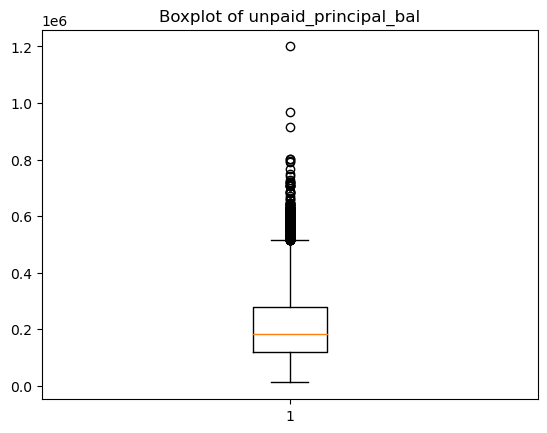

In [13]:
# Boxplot of 'unpaid_principal_bal' column to check outliers
plt.boxplot(data['unpaid_principal_bal'])

# display title
plt.title("Boxplot of unpaid_principal_bal")

# display figures
plt.show()

In [14]:
# First Quartile of 'unpaid_principal_bal' column
Q1_upb = np.percentile(data['unpaid_principal_bal'], 25, interpolation='midpoint')
# Second Quartile of 'unpaid_principal_bal' column
Q2_upb = np.percentile(data['unpaid_principal_bal'], 50, interpolation='midpoint')
# Third Quartile of 'unpaid_principal_bal' column
Q3_upb = np.percentile(data['unpaid_principal_bal'], 75, interpolation='midpoint')
# (interquartile range) IQR of  'unpaid_principal_bal' column
IQR_upb = Q3_upb-Q1_upb
# lower whisker of 'unpaid_principal_bal'  column
low_upb = Q1_upb-1.5*IQR_upb
# upper whisker of 'unpaid_principal_bal' column
up_upb = Q3_upb+1.5*IQR_upb

# to find the outliers  in 'unpaid_principal_bal' column and display it
outlier_upb = [] 
for x_upb in data['unpaid_principal_bal']:
    if((x_upb>up_upb) or (x_upb<low_upb)):
        outlier_upb.append(x_upb)
f"Outliers of 'unpaid_principal_bal' column = {outlier_upb}"


"Outliers of 'unpaid_principal_bal' column = [520000, 588000, 610000, 590000, 520000, 621000, 626000, 526000, 626000, 590000, 623000, 605000, 600000, 557000, 625000, 540000, 603000, 626000, 555000, 620000, 609000, 530000, 562000, 625000, 544000, 625000, 580000, 556000, 550000, 605000, 600000, 531000, 623000, 616000, 546000, 581000, 540000, 625000, 534000, 523000, 526000, 539000, 626000, 600000, 610000, 606000, 613000, 600000, 547000, 619000, 555000, 590000, 615000, 626000, 626000, 522000, 536000, 574000, 612000, 571000, 535000, 607000, 595000, 626000, 617000, 517000, 626000, 525000, 580000, 560000, 560000, 581000, 582000, 546000, 582000, 626000, 570000, 595000, 625000, 571000, 625000, 626000, 689000, 543000, 626000, 615000, 580000, 522000, 575000, 618000, 529000, 600000, 626000, 525000, 626000, 598000, 560000, 595000, 558000, 613000, 532000, 608000, 618000, 600000, 578000, 625000, 566000, 625000, 520000, 544000, 569000, 578000, 529000, 539000, 602000, 600000, 548000, 529000, 541000, 62

##### Outliers' in 'loan_term' column

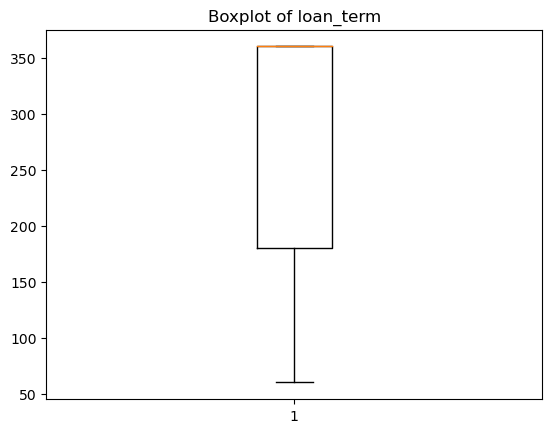

In [15]:
# Boxplot of 'loan_term' column to check outliers
plt.boxplot(data['loan_term'])

# display title
plt.title("Boxplot of loan_term")

# display figures
plt.show()

~ no outliers present

##### Outliers' in 'loan_to_value' column

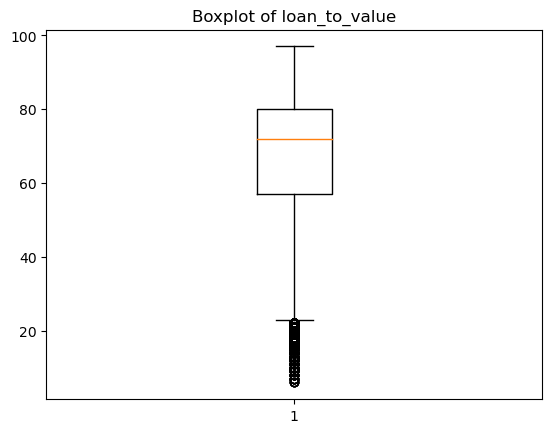

In [16]:
# Boxplot of 'loan_to_value' column to check outliers
plt.boxplot(data['loan_to_value'])

# display title
plt.title("Boxplot of loan_to_value")

# display figures
plt.show()

In [17]:
# First Quartile of 'loan_to_value' column
Q1_ltv = np.percentile(data['loan_to_value'], 25, interpolation='midpoint')
# Second Quartile of 'loan_to_value' column
Q2_ltv = np.percentile(data['loan_to_value'], 50, interpolation='midpoint')
# Third Quartile of 'loan_to_value' column
Q3_ltv = np.percentile(data['loan_to_value'], 75, interpolation='midpoint')
# (interquartile range) IQR of  'loan_to_value' column
IQR_ltv = Q3_ltv-Q1_ltv
# lower whisker of 'loan_to_value'  column
low_ltv = Q1_ltv-1.5*IQR_ltv 
# upper whisker of 'loan_to_value' column
up_ltv = Q3_ltv+1.5*IQR_ltv

# to find the outliers  in 'loan_to_value' column and display it
outlier_ltv = [] 
for x_ltv in data['loan_to_value']:
    if((x_ltv>up_ltv) or (x_ltv<low_ltv)):
        outlier_ltv.append(x_ltv)
f"Outliers of 'loan_to_value' column = {outlier_ltv}"


"Outliers of 'loan_to_value' column = [20, 21, 20, 11, 19, 22, 22, 19, 20, 18, 20, 12, 16, 22, 22, 17, 21, 19, 20, 21, 19, 17, 22, 19, 16, 15, 22, 20, 15, 21, 12, 16, 22, 14, 14, 12, 14, 18, 21, 21, 17, 21, 16, 21, 21, 19, 21, 19, 18, 13, 11, 22, 17, 22, 20, 19, 16, 6, 17, 18, 19, 22, 22, 19, 19, 21, 20, 22, 12, 7, 11, 19, 17, 22, 22, 14, 22, 19, 21, 18, 17, 22, 22, 17, 19, 22, 10, 21, 20, 19, 17, 19, 22, 20, 11, 13, 20, 16, 19, 19, 21, 20, 11, 22, 22, 20, 22, 19, 16, 21, 12, 17, 10, 17, 18, 17, 20, 15, 10, 21, 16, 14, 21, 19, 22, 22, 20, 19, 21, 20, 14, 17, 21, 22, 21, 20, 22, 21, 14, 16, 14, 19, 20, 13, 19, 13, 20, 12, 16, 20, 14, 22, 16, 22, 10, 20, 20, 16, 11, 20, 21, 18, 19, 19, 22, 22, 22, 20, 22, 17, 14, 20, 22, 20, 20, 11, 21, 22, 17, 17, 22, 22, 14, 21, 22, 22, 20, 21, 19, 14, 15, 22, 16, 17, 21, 18, 21, 17, 21, 8, 20, 22, 20, 22, 11, 18, 18, 17, 16, 18, 15, 16, 18, 20, 17, 18, 20, 20, 18, 21, 16, 13, 10, 13, 16, 16, 13, 18, 20, 16, 19, 17, 19, 19, 19, 17, 18, 20, 19, 10, 15, 

##### Outliers' in 'debt_to_income_ratio' column

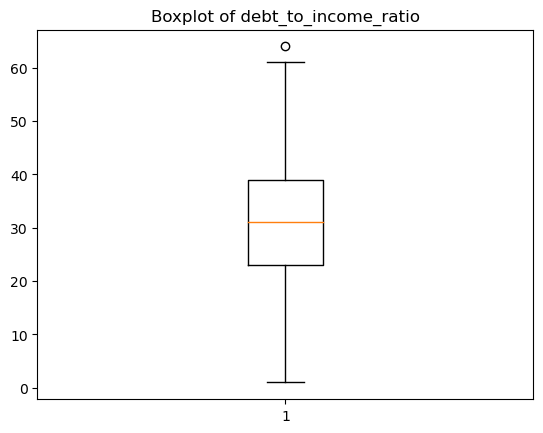

In [18]:
# Boxplot of 'debt_to_income_ratio' column to check outliers
plt.boxplot(data['debt_to_income_ratio'])

# display title
plt.title("Boxplot of debt_to_income_ratio")

# display figures
plt.show()

In [19]:
# First Quartile of 'debt_to_income_ratio' column
Q1_dtic = np.percentile(data['debt_to_income_ratio'], 25, interpolation='midpoint')
# Second Quartile of 'debt_to_income_ratio' column
Q2_dtic = np.percentile(data['debt_to_income_ratio'], 50, interpolation='midpoint')
# Third Quartile of 'debt_to_income_ratio' column
Q3_dtic = np.percentile(data['debt_to_income_ratio'], 75, interpolation='midpoint')
# (interquartile range) IQR of  'debt_to_income_ratio' column
IQR_dtic = Q3_dtic-Q1_dtic
# lower whisker of 'debt_to_income_ratio'  column
low_dtic = Q1_dtic-1.5*IQR_dtic 
# upper whisker of 'debt_to_income_ratio' column
up_dtic = Q3_dtic+1.5*IQR_dtic

# to find the outliers  in 'debt_to_income_ratio' column and display it
outlier_dtic = [] 
for x_dtic in data['debt_to_income_ratio']:
    if((x_dtic>up_dtic) or (x_dtic<low_dtic)):
        outlier_dtic.append(x_dtic)
f"Outliers of 'debt_to_income_ratio' column = {outlier_dtic}"


"Outliers of 'debt_to_income_ratio' column = [64.0]"

##### Outliers' in 'borrower_credit_score' column

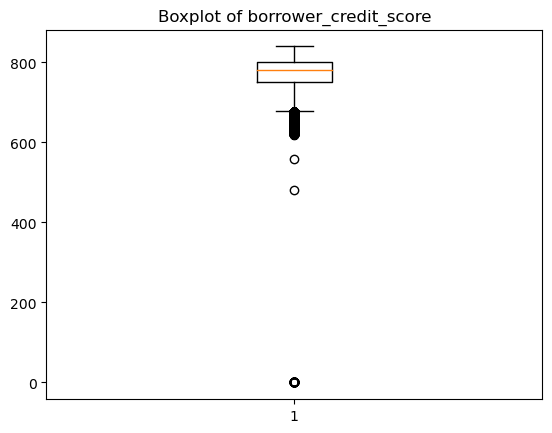

In [20]:
# Boxplot of 'borrower_credit_score' column to check outliers
plt.boxplot(data['borrower_credit_score'])

# display title
plt.title("Boxplot of borrower_credit_score")

# display figures
plt.show()

In [21]:
# First Quartile of 'borrower_credit_score' column
Q1_bcs = np.percentile(data['borrower_credit_score'], 25, interpolation='midpoint')
# Second Quartile of 'borrower_credit_score' column
Q2_bcs = np.percentile(data['borrower_credit_score'], 50, interpolation='midpoint')
# Third Quartile of 'borrower_credit_score' column
Q3_bcs = np.percentile(data['borrower_credit_score'], 75, interpolation='midpoint')
# (interquartile range) IQR of  'borrower_credit_score' column
IQR_bcs = Q3_bcs-Q1_bcs
# lower whisker of 'borrower_credit_score'  column
low_bcs = Q1_bcs-1.5*IQR_bcs 
# upper whisker of 'borrower_credit_score' column
up_bcs = Q3_bcs+1.5*IQR_bcs

# to find the outliers  in 'borrower_credit_score' column and display it
outlier_bcs = [] 
for x_bcs in data['borrower_credit_score']:
    if((x_bcs>up_bcs) or (x_bcs<low_bcs)):
        outlier_bcs.append(x_bcs)
f"Outliers of 'borrower_credit_score' column = {outlier_bcs}"


"Outliers of 'borrower_credit_score' column = [633.0, 675.0, 652.0, 669.0, 640.0, 621.0, 667.0, 669.0, 630.0, 661.0, 650.0, 667.0, 627.0, 648.0, 641.0, 650.0, 626.0, 675.0, 672.0, 654.0, 640.0, 669.0, 669.0, 641.0, 668.0, 672.0, 635.0, 677.0, 665.0, 639.0, 637.0, 674.0, 676.0, 667.0, 650.0, 659.0, 673.0, 643.0, 645.0, 640.0, 666.0, 672.0, 663.0, 657.0, 658.0, 660.0, 637.0, 621.0, 660.0, 663.0, 645.0, 664.0, 646.0, 663.0, 655.0, 643.0, 655.0, 657.0, 669.0, 650.0, 670.0, 658.0, 626.0, 621.0, 629.0, 633.0, 654.0, 624.0, 666.0, 673.0, 672.0, 665.0, 668.0, 669.0, 670.0, 670.0, 638.0, 632.0, 649.0, 649.0, 653.0, 672.0, 644.0, 648.0, 649.0, 660.0, 671.0, 656.0, 650.0, 649.0, 652.0, 660.0, 673.0, 645.0, 634.0, 662.0, 643.0, 662.0, 652.0, 651.0, 660.0, 635.0, 655.0, 674.0, 651.0, 636.0, 664.0, 656.0, 660.0, 643.0, 639.0, 649.0, 661.0, 635.0, 627.0, 661.0, 625.0, 644.0, 635.0, 654.0, 647.0, 656.0, 641.0, 624.0, 669.0, 667.0, 675.0, 641.0, 667.0, 642.0, 659.0, 673.0, 668.0, 661.0, 620.0, 676.0, 6

##### Outliers' in 'co-borrower_credit_score' column

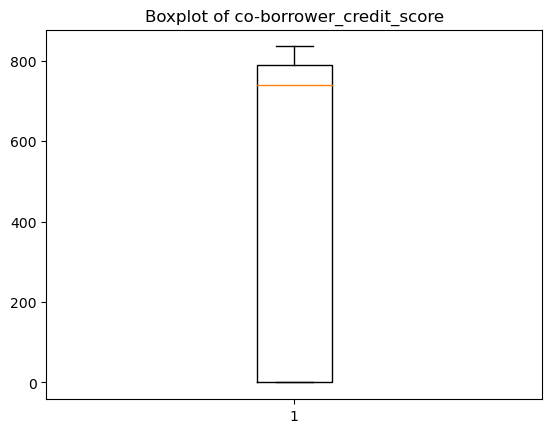

In [22]:
# Boxplot of 'co-borrower_credit_score' column to check outliers
plt.boxplot(data['co-borrower_credit_score'])

# display title
plt.title("Boxplot of co-borrower_credit_score")

# display figures
plt.show()

~ no outliers present

### CORRELATION

In [23]:
# creating an instance for correlation
corrmatrix = data.corr()

# displaying the values of 'corrmatrix'
corrmatrix

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,...,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13
interest_rate,1.000000,-0.002854,0.720734,0.273379,-0.128075,0.181988,-0.210468,0.143116,-0.138013,0.055883,...,0.030543,0.035726,0.034311,0.032133,0.035393,0.035841,0.037994,0.037051,0.039708,0.054298
unpaid_principal_bal,-0.002854,1.000000,0.192168,0.062447,0.130565,0.073415,0.052061,0.010926,0.132632,0.015985,...,-0.010344,-0.011461,-0.007814,-0.008912,-0.009228,-0.008983,-0.005866,-0.006412,-0.008254,-0.017120
loan_term,0.720734,0.192168,1.000000,0.292565,-0.107341,0.137852,-0.072021,0.190762,-0.110268,0.028731,...,0.011688,0.013645,0.011622,0.011406,0.012954,0.014031,0.015510,0.014814,0.015773,0.023502
loan_to_value,0.273379,0.062447,0.292565,1.000000,-0.100898,0.126993,-0.142574,0.490128,-0.109546,0.075813,...,0.009826,0.006928,0.010560,0.010243,0.009938,0.008775,0.011103,0.010856,0.010811,0.016357
number_of_borrowers,-0.128075,0.130565,-0.107341,-0.100898,1.000000,-0.134395,0.120120,-0.058976,0.996498,-0.015769,...,-0.023442,-0.024665,-0.022337,-0.023716,-0.027472,-0.028033,-0.025946,-0.027608,-0.029661,-0.039979
debt_to_income_ratio,0.181988,0.073415,0.137852,0.126993,-0.134395,1.000000,-0.184406,0.066946,-0.145145,0.016558,...,0.015444,0.020784,0.021242,0.021904,0.025402,0.022836,0.024310,0.025467,0.024697,0.038033
borrower_credit_score,-0.210468,0.052061,-0.072021,-0.142574,0.120120,-0.184406,1.000000,-0.062849,0.153952,-0.004608,...,-0.057269,-0.066448,-0.063116,-0.064656,-0.063057,-0.062565,-0.062256,-0.061407,-0.063148,-0.094215
insurance_percent,0.143116,0.010926,0.190762,0.490128,-0.058976,0.066946,-0.062849,1.000000,-0.063370,0.145292,...,-0.000735,-0.003598,-0.001315,-0.003097,-0.001997,-0.002225,-0.000652,-0.000102,0.000598,0.005722
co-borrower_credit_score,-0.138013,0.132632,-0.110268,-0.109546,0.996498,-0.145145,0.153952,-0.063370,1.000000,-0.016058,...,-0.024716,-0.026393,-0.024080,-0.025423,-0.028770,-0.029218,-0.027354,-0.028930,-0.030878,-0.042651
insurance_type,0.055883,0.015985,0.028731,0.075813,-0.015769,0.016558,-0.004608,0.145292,-0.016058,1.000000,...,0.000428,0.003046,0.002948,-0.002356,0.001572,-0.001210,0.002546,-0.000638,-0.000890,0.005999


~ 'm13' column is the target and it is having better positive correlation with 'm12' and 'm11' columns 

### ENCODING 

In [24]:
# count of unique values in 'origination_date' column
data['origination_date'].nunique()

3

In [25]:
# count of unique values in 'first_payment_date' column
data['first_payment_date'].nunique()

4

In [26]:
# display column names
data.columns

Index(['source', 'interest_rate', 'unpaid_principal_bal', 'loan_term',
       'origination_date', 'first_payment_date', 'loan_to_value',
       'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13'],
      dtype='object')

~  source , origination_date, first_payment_date  are of object type which can be encoded by one hot encoding

In [27]:
# creating a dataframe to perform one hot encoding on columns source , origination_date, first_payment_date 
data_encoding = data .drop(['interest_rate', 'unpaid_principal_bal', 'loan_term', 'loan_to_value',
       'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
       'insurance_percent', 'co-borrower_credit_score', 'insurance_type', 'm1',
       'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12',
       'm13'], axis = 1)

In [28]:
# display the first 5 rows
data_encoding.head()

,source,origination_date,first_payment_date
0,Z,2012-03-01,05/2012
1,Y,2012-01-01,03/2012
2,Z,2012-01-01,03/2012
3,X,2012-02-01,04/2012
4,X,2012-02-01,04/2012


In [29]:
# performing one hot encoding and displaying it
data_encoding1 = pd.get_dummies(data_encoding) 
data_encoding1

,source_X,source_Y,source_Z,origination_date_2012-01-01,origination_date_2012-02-01,origination_date_2012-03-01,first_payment_date_02/2012,first_payment_date_03/2012,first_payment_date_04/2012,first_payment_date_05/2012
0,0,0,1,0,0,1,0,0,0,1
1,0,1,0,1,0,0,0,1,0,0
2,0,0,1,1,0,0,0,1,0,0
3,1,0,0,0,1,0,0,0,1,0
4,1,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
116053,0,1,0,0,1,0,0,0,1,0
116054,0,0,1,1,0,0,0,1,0,0
116055,1,0,0,0,1,0,0,0,1,0
116056,1,0,0,0,1,0,0,0,1,0


~'insurance_type' is already an encoded column

### SCALING

In [30]:
# count of unique values in 'loan_term'
data['loan_term'].nunique()

140

In [31]:
# # count of unique values in 'insurance_type'
data['insurance_type'].nunique()

2

~'insurance_type' is an encoded column hence dropping it

In [32]:
# preparing the dataframe to perform min max scaling and dropping the object columns, 
# 'insurance_type' column and 'm13' column which is the target
S = data.drop(['source', 'origination_date', 'first_payment_date', 'm13', 'insurance_type'], axis = 1) 

# display first 5 values under the dataframe S
S.head()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,m1,...,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,4.250,214000,360,95,1.0,22.0,694.0,30.0,0.0,0,...,0,0,0,0,1,0,0,0,0,0
1,4.875,144000,360,72,1.0,44.0,697.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,1,0
2,3.250,366000,180,49,1.0,33.0,780.0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.750,135000,360,46,2.0,44.0,633.0,0.0,638.0,0,...,0,0,0,0,0,0,1,1,1,1
4,4.750,124000,360,80,1.0,43.0,681.0,0.0,0.0,0,...,2,3,4,5,6,7,8,9,10,11


In [33]:
# display summary statistics
S.describe()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,m1,...,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
count,116058.000000,1.160580e+05,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,...,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000
mean,3.868961,2.082262e+05,292.280997,67.431939,1.593186,30.742293,769.926778,2.786288,459.611565,0.003197,...,0.001973,0.002180,0.003533,0.003421,0.004162,0.004825,0.005359,0.006617,0.007109,0.008065
std,0.461020,1.146851e+05,89.762415,17.291719,0.491242,9.730798,42.210706,8.096464,381.946926,0.063354,...,0.055427,0.062161,0.082638,0.087553,0.100961,0.113128,0.128242,0.148430,0.162884,0.178128
min,2.250000,1.100000e+04,60.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.500000,1.200000e+05,180.000000,57.000000,1.000000,23.000000,751.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.875000,1.830000e+05,360.000000,72.000000,2.000000,31.000000,782.000000,0.000000,740.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.125000,2.780000e+05,360.000000,80.000000,2.000000,39.000000,800.000000,0.000000,791.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.750000,1.200000e+06,360.000000,97.000000,2.000000,64.000000,840.000000,40.000000,836.000000,3.000000,...,5.000000,6.000000,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000,13.000000,14.000000


In [34]:
# display column names
S.columns

Index(['interest_rate', 'unpaid_principal_bal', 'loan_term', 'loan_to_value',
       'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
       'insurance_percent', 'co-borrower_credit_score', 'm1', 'm2', 'm3', 'm4',
       'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12'],
      dtype='object')

In [35]:
# creating an instance for MinMaxScaler() and defining the range between 0 and 1 using feature_range
minmax = MinMaxScaler(feature_range=(0,1)) 

In [36]:
# Fit MinMaxScaler and tranform the scaled values to 'S1'
S1 = minmax.fit_transform(S)

# display the values of S1
S1

array([[0.44444444, 0.17073171, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.58333333, 0.1118587 , 1.        , ..., 0.        , 0.07692308,
        0.        ],
       [0.22222222, 0.29857023, 0.4       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.36111111, 0.13036165, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.44444444, 0.13288478, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.25      , 0.20269134, 0.4       , ..., 0.        , 0.        ,
        0.        ]])

In [37]:
# converting back to a dataframe since it is array format and displaying it
S1 = pd.DataFrame(S1, columns=['interest_rate', 'unpaid_principal_bal', 'loan_term', 'loan_to_value',
       'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score',
       'insurance_percent', 'co-borrower_credit_score', 'm1', 'm2', 'm3', 'm4',
       'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12'])
S1

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,m1,...,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,0.444444,0.170732,1.0,0.978022,0.0,0.333333,0.826190,0.750,0.000000,0.0,...,0.0,0.0,0.000000,0.000,0.111111,0.0,0.000000,0.000000,0.000000,0.000000
1,0.583333,0.111859,1.0,0.725275,0.0,0.682540,0.829762,0.000,0.000000,0.0,...,0.0,0.0,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.076923,0.000000
2,0.222222,0.298570,0.4,0.472527,0.0,0.507937,0.928571,0.000,0.000000,0.0,...,0.0,0.0,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
3,0.555556,0.104289,1.0,0.439560,1.0,0.682540,0.753571,0.000,0.763158,0.0,...,0.0,0.0,0.000000,0.000,0.000000,0.0,0.090909,0.083333,0.076923,0.071429
4,0.555556,0.095038,1.0,0.813187,0.0,0.666667,0.810714,0.000,0.000000,0.0,...,0.4,0.5,0.571429,0.625,0.666667,0.7,0.727273,0.750000,0.769231,0.785714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116053,0.416667,0.119428,1.0,0.901099,1.0,0.333333,0.953571,0.625,0.959330,0.0,...,0.0,0.0,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
116054,0.166667,0.116905,0.2,0.318681,0.0,0.571429,0.947619,0.000,0.000000,0.0,...,0.0,0.0,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
116055,0.361111,0.130362,1.0,0.571429,1.0,0.761905,0.861905,0.000,0.864833,0.0,...,0.0,0.0,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
116056,0.444444,0.132885,1.0,0.747253,1.0,0.190476,0.898810,0.000,0.892344,0.0,...,0.0,0.0,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


In [38]:
# display the summary statistics of all numerical columns after applying scaling
S1.describe()

,interest_rate,unpaid_principal_bal,loan_term,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,m1,...,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
count,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,...,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000,116058.000000
mean,0.359769,0.165876,0.774270,0.675076,0.593186,0.472100,0.916579,0.069657,0.549775,0.001066,...,0.000395,0.000363,0.000505,0.000428,0.000462,0.000483,0.000487,0.000551,0.000547,0.000576
std,0.102449,0.096455,0.299208,0.190019,0.491242,0.154457,0.050251,0.202412,0.456874,0.021118,...,0.011085,0.010360,0.011805,0.010944,0.011218,0.011313,0.011658,0.012369,0.012530,0.012723
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.277778,0.091674,0.400000,0.560440,0.000000,0.349206,0.894048,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.361111,0.144659,1.000000,0.725275,1.000000,0.476190,0.930952,0.000000,0.885167,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.416667,0.224558,1.000000,0.813187,1.000000,0.603175,0.952381,0.000000,0.946172,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


~ For all the columns, minimum value is 0 and maximum value is one after applying scaling

### SPLITTING THE DATA INTO FEATURES AND TARGET

-X indicates Fatures  = 'source', 'origination_date', 'first_payment_date', 'insurance_type', 'interest_rate', 'unpaid_principal_bal', 'loan_term', 'loan_to_value', 'number_of_borrowers', 'debt_to_income_ratio', 'borrower_credit_score', 'insurance_percent', 'co-borrower_credit_score', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12' columns

-y indicates Target = 'm13' column

In [39]:
# displaying features
X = pd.concat([data_encoding1, data['insurance_type'], S1], axis=1)
X

,source_X,source_Y,source_Z,origination_date_2012-01-01,origination_date_2012-02-01,origination_date_2012-03-01,first_payment_date_02/2012,first_payment_date_03/2012,first_payment_date_04/2012,first_payment_date_05/2012,...,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12
0,0,0,1,0,0,1,0,0,0,1,...,0.0,0.0,0.000000,0.000,0.111111,0.0,0.000000,0.000000,0.000000,0.000000
1,0,1,0,1,0,0,0,1,0,0,...,0.0,0.0,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.076923,0.000000
2,0,0,1,1,0,0,0,1,0,0,...,0.0,0.0,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
3,1,0,0,0,1,0,0,0,1,0,...,0.0,0.0,0.000000,0.000,0.000000,0.0,0.090909,0.083333,0.076923,0.071429
4,1,0,0,0,1,0,0,0,1,0,...,0.4,0.5,0.571429,0.625,0.666667,0.7,0.727273,0.750000,0.769231,0.785714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116053,0,1,0,0,1,0,0,0,1,0,...,0.0,0.0,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
116054,0,0,1,1,0,0,0,1,0,0,...,0.0,0.0,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
116055,1,0,0,0,1,0,0,0,1,0,...,0.0,0.0,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
116056,1,0,0,0,1,0,0,0,1,0,...,0.0,0.0,0.000000,0.000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000


In [40]:
# display column names
X.columns

Index(['source_X', 'source_Y', 'source_Z', 'origination_date_2012-01-01',
       'origination_date_2012-02-01', 'origination_date_2012-03-01',
       'first_payment_date_02/2012', 'first_payment_date_03/2012',
       'first_payment_date_04/2012', 'first_payment_date_05/2012',
       'insurance_type', 'interest_rate', 'unpaid_principal_bal', 'loan_term',
       'loan_to_value', 'number_of_borrowers', 'debt_to_income_ratio',
       'borrower_credit_score', 'insurance_percent',
       'co-borrower_credit_score', 'm1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7',
       'm8', 'm9', 'm10', 'm11', 'm12'],
      dtype='object')

In [41]:
# display the target
y = data['m13']
y

0         1
1         1
2         1
3         1
4         1
         ..
116053    0
116054    0
116055    0
116056    0
116057    0
Name: m13, Length: 116058, dtype: int64

### SPLITTING THE DATA INTO TRAINING & TESTING

In [42]:
#  splitting the dataset into testing and training data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

#### MODELS

#### 1) LOGISTIC REGRESSION

In [43]:
# creating an instance for LogisticRegression()
log_reg = LogisticRegression(max_iter=150)

In [44]:
# fit the training data to the instance of LogisticRegression() and create a model
log_model = log_reg.fit(X_train, y_train)

In [45]:
# predict the target of the test data using the features of test data
log_ypred = log_model.predict(X_test)
log_ypred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [46]:
# displaying confusion matrix
print(confusion_matrix(y_test, log_ypred))

[[28851     1]
 [  135    28]]


In [47]:
# accuracy score
print(accuracy_score(y_test, log_ypred))

0.9953127692572807


In [48]:
# precision score
print(precision_score(y_test, log_ypred))

0.9655172413793104


In [49]:
# recall score
print(recall_score(y_test, log_ypred))

0.17177914110429449


#### 2) kNN MODEL

In [50]:
neighbors = np.arange(3,15) # take values from 3 to 14 and stores in array format
neighbors

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [51]:
# create an empty list to store accuracy
metric_k = [] 

# take values from 3 to 14 and store it in array format in 'neighbors' variable
neighbors = np.arange(3,15) 

# creating a loop for k and varying the values of k from 3 to 14
for k in neighbors:
    
    # for the first iteration k value = 3,  creating an instance
    knn = KNeighborsClassifier(n_neighbors=k) 
    
    # fitting the training data to the model and creating a model using the iteration
    knn_model = knn.fit(X_train, y_train) 
    
    # finding the predicted values of test data using features of test data for all iterations
    y_pred_knn = knn_model.predict(X_test) 
    
    # calculating accuracy of all iterations and storing in variable 
    knn_acc = accuracy_score(y_test, y_pred_knn) 
    
    # appending accuracy of all iterations to the empty list 
    metric_k.append(knn_acc) 


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [52]:
# displaying accuracy values for k = 3 to 14
metric_k

[0.9949336550060314,
 0.9948302602102361,
 0.9948647251421678,
 0.9948647251421678,
 0.9948991900740995,
 0.9947613303463726,
 0.9947613303463726,
 0.9947957952783043,
 0.9947613303463726,
 0.9947268654144408,
 0.9947268654144408,
 0.9947613303463726]

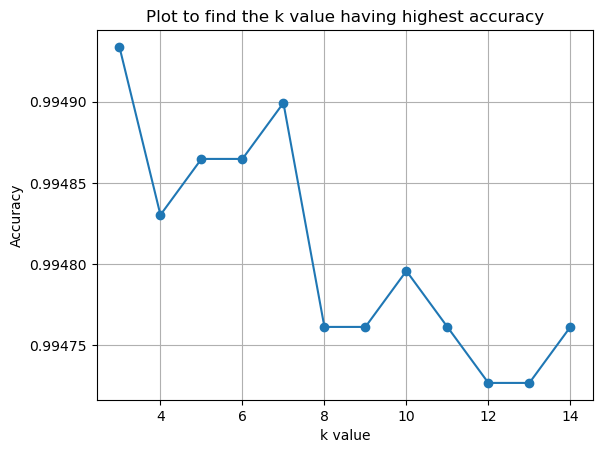

In [53]:
# plot k values versus accuracy to find out which value of k is having highest accuracy
plt.plot(neighbors, metric_k, 'o-') 

# display title
plt.title('Plot to find the k value having highest accuracy')

# plot label on x-axis
plt.xlabel('k value')

# plot label on y-axis
plt.ylabel('Accuracy')

# display grid
plt.grid()

~from the above display, highest accuracy of 0.9949336550060314 is found for k values = 3

In [54]:
# using k value = 3, creating an instance
knn = KNeighborsClassifier(n_neighbors=3) 

# creating model with training data
knn_model = knn.fit(X_train, y_train) 

# finding the predicted values of test data using features of test data
y_pred_knn = knn_model.predict(X_test) 

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [55]:
# display confusion matrix
print(confusion_matrix(y_test, y_pred_knn))

# display accuracy score
print(accuracy_score(y_test, y_pred_knn))

[[28848     4]
 [  143    20]]
0.9949336550060314


In [56]:
# precision score
print(precision_score(y_test, y_pred_knn))

0.8333333333333334


In [57]:
# recall score
print(recall_score(y_test, y_pred_knn))

0.12269938650306748


#### 3) SVM MODEL

##### (a) 'linear' kernel

In [58]:
# creating an instance for SVM using linear kernel
svm_lin = SVC(kernel = 'linear') 

In [59]:
# creating model using training data
svm_linmod = svm_lin.fit(X_train, y_train) 

In [60]:
# predict the target of the test data using the features of test data
y_pred_svmlin = svm_lin.predict(X_test) 

In [61]:
# display confusion matrix
confusion_matrix(y_test, y_pred_svmlin)

array([[28852,     0],
       [  133,    30]], dtype=int64)

In [62]:
# display accuracy score
accuracy_score(y_test, y_pred_svmlin)

0.995416164053076

In [63]:
# precision score
print(precision_score(y_test, y_pred_svmlin))

1.0


In [64]:
# recall score
print(recall_score(y_test, y_pred_svmlin))

0.18404907975460122


##### (b) 'rbf' kernel

In [65]:
 # creating an instance for SVM  using rbf kernel
svm_rbf = SVC(kernel = 'rbf') 

In [66]:
# creating model using training data
svm_rbfmod = svm_rbf.fit(X_train, y_train) 

In [67]:
# predict the target of the test data using the features of test data
y_pred_svmrbf = svm_rbf.predict(X_test)

In [68]:
# display confusion matrix
confusion_matrix(y_test, y_pred_svmrbf)

array([[28852,     0],
       [  145,    18]], dtype=int64)

In [69]:
# display accuracy score
accuracy_score(y_test, y_pred_svmrbf)

0.9950025848698949

In [70]:
# precision score
print(precision_score(y_test, y_pred_svmrbf))

1.0


In [71]:
# recall score
print(recall_score(y_test, y_pred_svmrbf))

0.11042944785276074


##### (c) 'polynomial' kernel

In [72]:
# creating an instance for SVM  using 'polynomial' kernel
svm_poly = SVC(kernel='poly') 

In [73]:
# creating model using training data
svm_polmod = svm_poly.fit(X_train, y_train) 

In [74]:
# predict the target of the test data using the features of test data
y_pred_svmpol = svm_poly.predict(X_test)

In [75]:
# display confusion matrix
confusion_matrix(y_test, y_pred_svmpol)

array([[28851,     1],
       [  140,    23]], dtype=int64)

In [76]:
# display accuracy score
accuracy_score(y_test, y_pred_svmpol)

0.995140444597622

In [77]:
# precision score
print(precision_score(y_test, y_pred_svmpol))

0.9583333333333334


In [78]:
# recall score
print(recall_score(y_test, y_pred_svmpol))

0.1411042944785276


#### 4) DECISION TREE

In [79]:
# creating an instance for decision tree classifier
dec_tree = DecisionTreeClassifier(random_state=42) 

In [80]:
# creating model using training data 
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [81]:
# predict the target of the test data using the features of test data
y_pred_dectree = dec_tree.predict (X_test)

In [82]:
# display confusion matrix
confusion_matrix(y_test, y_pred_dectree)

array([[28744,   108],
       [  106,    57]], dtype=int64)

In [83]:
# display accuracy score
accuracy_score(y_test, y_pred_dectree)

0.9926245045666034

In [84]:
# precision score
print(precision_score(y_test, y_pred_dectree))

0.34545454545454546


In [85]:
# recall score
print(recall_score(y_test, y_pred_dectree))

0.3496932515337423


#### 5) RANDOM FOREST

In [86]:
# creating an instance for random forest classifier
ran_for = RandomForestClassifier(random_state=42)

In [87]:
# creating model using training data 
ran_for.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [88]:
# predict the target of the test data using the features of test data
y_pred_ranfor = ran_for.predict (X_test)

In [89]:
# display confusion matrix
confusion_matrix(y_test, y_pred_ranfor)

array([[28842,    10],
       [  109,    54]], dtype=int64)

In [90]:
# display accuracy score
accuracy_score(y_test, y_pred_ranfor)

0.9958986731001206

In [91]:
# precision score
print(precision_score(y_test, y_pred_ranfor))

0.84375


In [92]:
# recall score
print(recall_score(y_test, y_pred_ranfor))

0.3312883435582822


ACCURACY SCORE
******
1) LOGISTIC REGRESSION - 0.9953127692572807

2) kNN MODEL - 0.9949336550060314

3) SVM MODEL,  (a) 'linear' kernel - 0.995416164053076,
               (b) 'rbf' kernel - 0.9950025848698949,
               (c) 'polynomial' kernel - 0.995140444597622
               
4) DECISION TREE - 0.9926245045666034

5) RANDOM FOREST - 0.9958986731001206

~ Highest accuracy score obtained for Random Forest